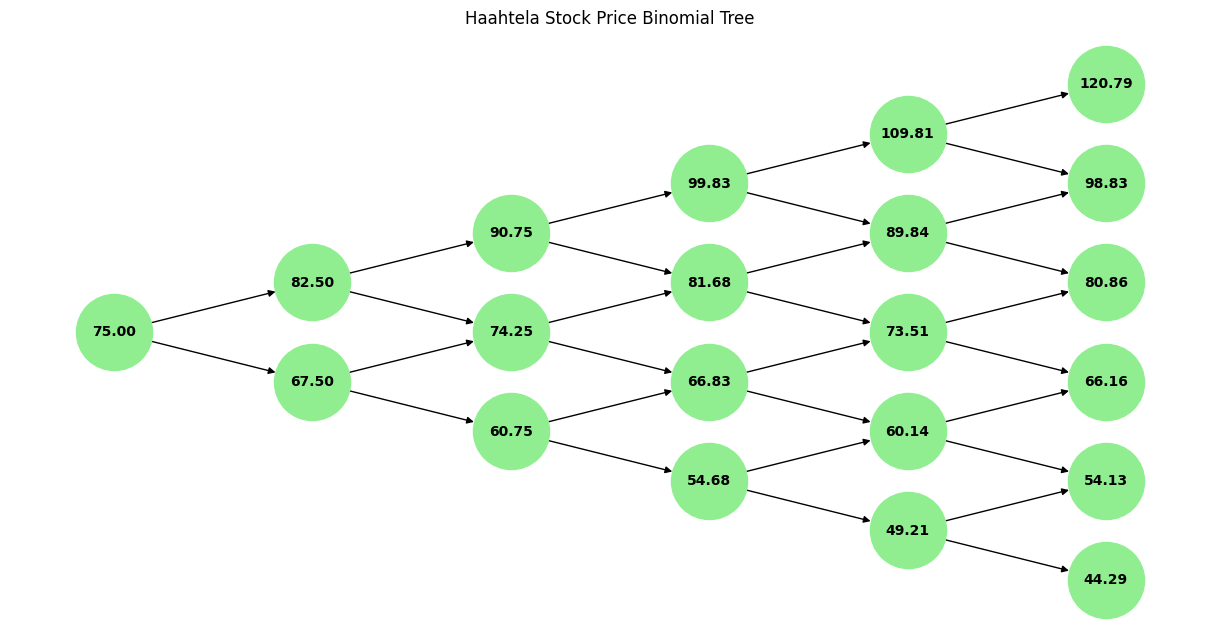

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define parameters
S = 75       # Initial stock price
N = 5        # Number of steps
u = 1.1      # Up factor (constant)
d = 0.9      # Down factor (constant)
p = 1        # Probability for up move

# Build the Haahtela Stock Price Tree
StockPrice = np.zeros((N + 1, N + 1))
for i in range(N + 1):
    for j in range(i + 1):
        StockPrice[j, i] = S * (u**j) * (d**(i - j))

# Plotting the Haahtela binomial tree
def plot_binomial_tree(tree, title):
    N = tree.shape[1] - 1
    G = nx.DiGraph()

    pos = {}
    labels = {}
    
    # Define the horizontal offset to center the nodes at each level
    for i in range(N + 1):
        for j in range(i + 1):
            node = f"{i},{j}"
            G.add_node(node)
            pos[node] = (i, j - (i / 2))  # Adjust vertical position to center the tree
            labels[node] = f"{tree[j, i]:.2f}"

            if i < N:
                G.add_edge(node, f"{i+1},{j}")
                G.add_edge(node, f"{i+1},{j+1}")

    # Plot
    plt.figure(figsize=(12, 6))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", edge_color="black")
    plt.title(title)
    plt.show()

# Plot the Haahtela Stock Price Tree
plot_binomial_tree(StockPrice, "Haahtela Stock Price Binomial Tree")


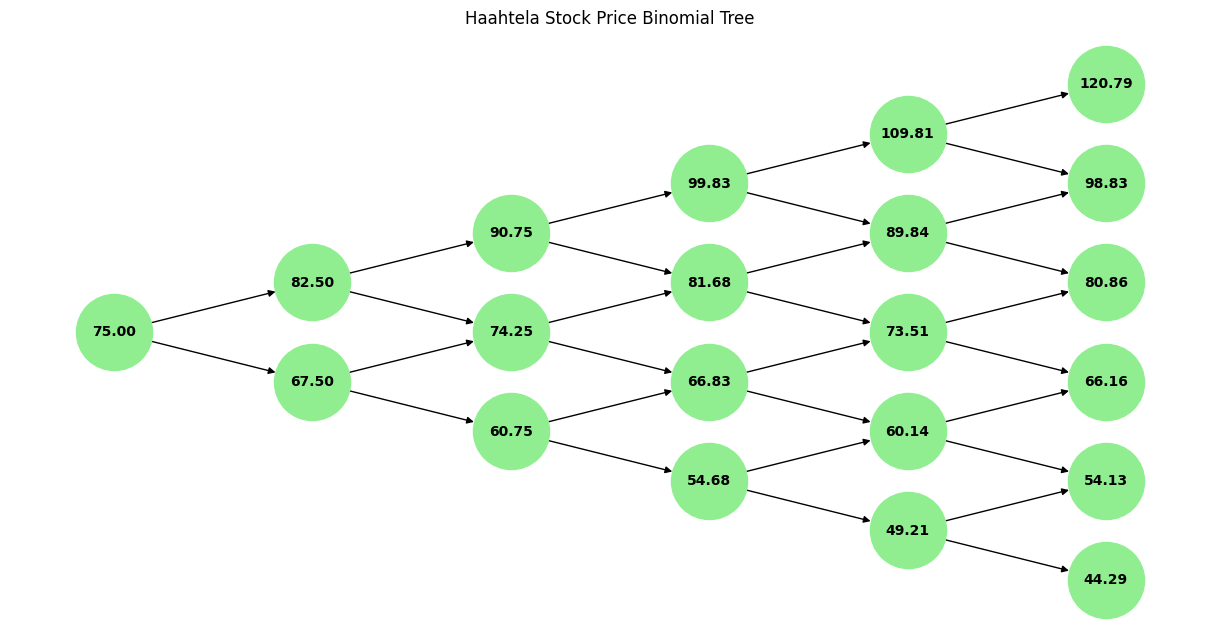

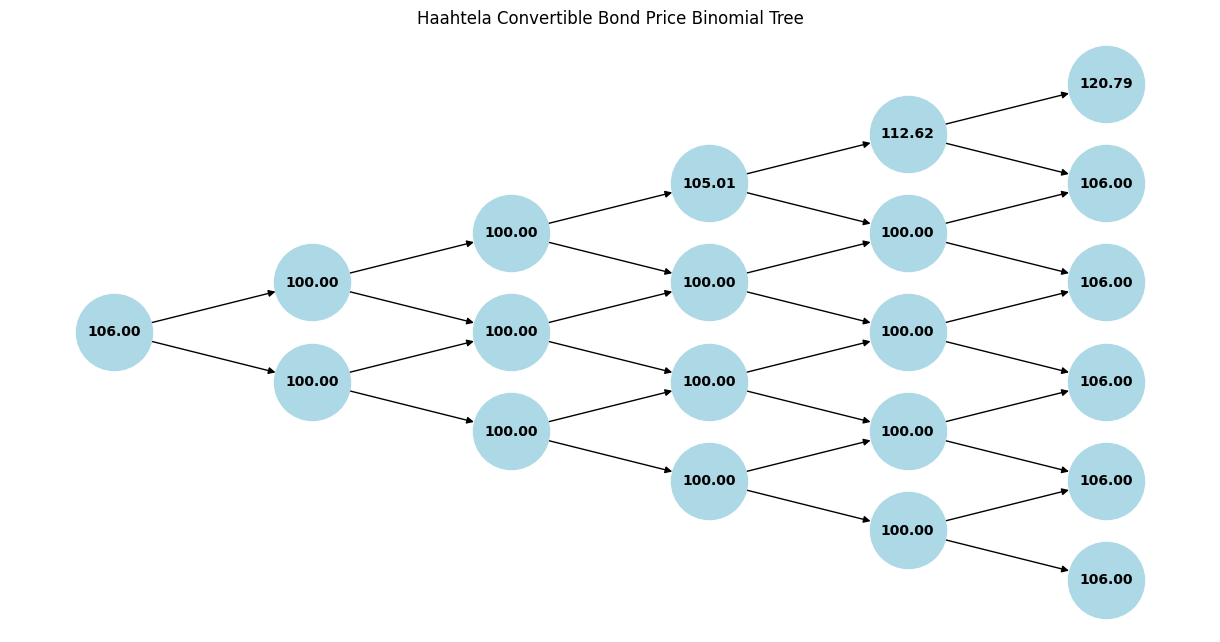

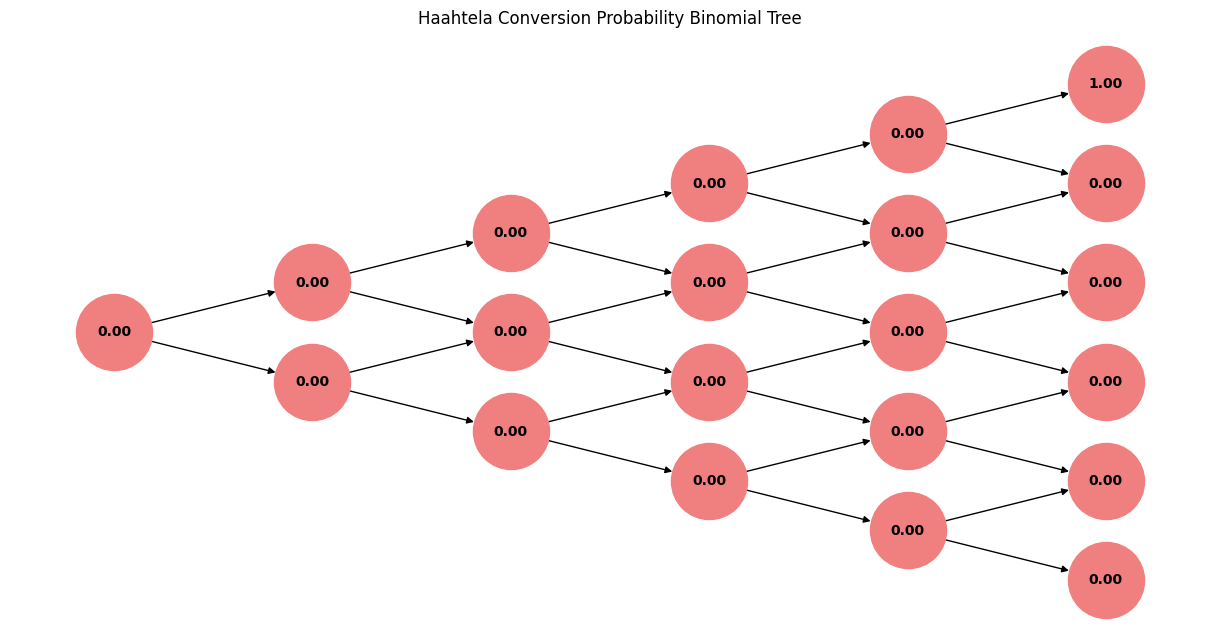

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define parameters
S = 75       # Initial stock price
N = 5        # Number of steps
u = 1.1      # Up factor
d = 0.9      # Down factor
p = 1        # Probability for up move (Haahtela tree characteristic)

# Convertible Bond Parameters
F = 100         # Face value of the bond
X = 100         # Strike price for conversion
Coupon = 6      # Annual coupon payment
r = 0.07        # Risk-free rate
CRatio = F / X  # Conversion ratio
dt = 1          # Time step 

# Build the Haahtela Stock Price Tree
StockPrice = np.zeros((N + 1, N + 1))
for i in range(N + 1):
    for j in range(i + 1):
        StockPrice[j, i] = S * (u**j) * (d**(i - j))

# Initialize Option Values and Conversion Probabilities at each node
OptionValue = np.zeros((N + 1, N + 1))
ConversionProbability = np.zeros((N + 1, N + 1))

# Initialize Option Values and Conversion Probabilities at maturity
for i in range(N + 1):
    OptionValue[i, N] = max(F + Coupon, CRatio * StockPrice[i, N])
    ConversionProbability[i, N] = 1 if OptionValue[i, N] == CRatio * StockPrice[i, N] else 0

# Backward calculation for Option Value and Conversion Probability
for j in range(N - 1, -1, -1):
    for i in range(j + 1):
        bond_value_if_held = F + Coupon if j == 0 else F
        discounted_value = (OptionValue[i + 1, j + 1] * p + OptionValue[i, j + 1] * (1 - p)) * np.exp(-r * dt)
        OptionValue[i, j] = max(bond_value_if_held, discounted_value)
        ConversionProbability[i, j] = 1 if OptionValue[i, j] == CRatio * StockPrice[i, j] else 0

# Plotting function for binomial tree
def plot_binomial_tree(tree, title, color='lightgreen'):
    steps = tree.shape[1] - 1
    G = nx.DiGraph()

    pos = {}
    labels = {}
    
    # Define the horizontal offset to center the nodes at each level
    for i in range(steps + 1):
        for j in range(i + 1):
            node = f"{i},{j}"
            G.add_node(node)
            pos[node] = (i, j - (i / 2))  # Adjust vertical position to center the tree
            labels[node] = f"{tree[j, i]:.2f}"

            if i < steps:
                G.add_edge(node, f"{i+1},{j}")
                G.add_edge(node, f"{i+1},{j+1}")

    # Plot
    plt.figure(figsize=(12, 6))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color=color, font_size=10, font_weight="bold", edge_color="black")
    plt.title(title)
    plt.show()

# Plot the Haahtela Stock Price Tree
plot_binomial_tree(StockPrice, "Haahtela Stock Price Binomial Tree")

# Plot the Convertible Bond Price Tree
plot_binomial_tree(OptionValue, "Haahtela Convertible Bond Price Binomial Tree", color='lightblue')

# Plot the Conversion Probability Tree
plot_binomial_tree(ConversionProbability, "Haahtela Conversion Probability Binomial Tree", color='lightcoral')
